# Football Analysis 2021



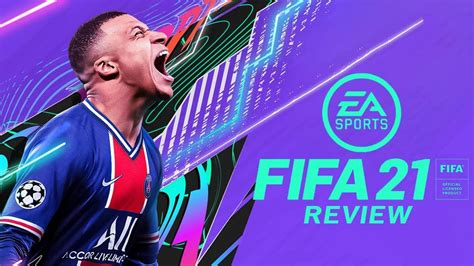

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
project_name='football-analysis'

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Data Preparation
Downloading datasets from Kaggle

In [5]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/aayushmishra1512/fifa-2021-complete-player-data")

     |████████████████████████████████| 58 kB 4.0 MB/s eta 0:00:011
     |████████████████████████████████| 78 kB 4.2 MB/s eta 0:00:011
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=85336363bb633a133438a0b4a2cb330c9728003323250109aba901a41b32b83b
  Stored in directory: /home/jovyan/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aarifansari
Your Kaggle Key: ········


100%|██████████| 412k/412k [00:00<00:00, 37.6MB/s]

In [6]:
football_data=pd.read_csv('fifa-2021-complete-player-data/FIFA-21 Complete.csv',sep=';')
football_data

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid
...,...,...,...,...,...,...,...,...,...
17976,256093,Jaime Ortíz,Ecuador,ST,56,21,0,64,Sociedad Deportiva Aucas
17977,256088,Michael Carcelén,Ecuador,CM,56,23,0,64,Club Deportivo El Nacional
17978,256074,Davide Luzi,Venezuela,ST,56,18,1,68,Zamora Fútbol Club
17979,256073,Sergio Sulbarán,Venezuela,RW,56,22,0,62,Zamora Fútbol Club


## Data Analysis and Visualization

In [7]:
football_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    17981 non-null  int64 
 1   name         17981 non-null  object
 2   nationality  17981 non-null  object
 3   position     17981 non-null  object
 4   overall      17981 non-null  int64 
 5   age          17981 non-null  int64 
 6   hits         17981 non-null  int64 
 7   potential    17981 non-null  int64 
 8   team         17981 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


Here, we can see columns and their datatypes and there are total 9 columns and 17981 rows that means there are 17981 player in the datasets.
It's obtain by function `football_data.info()`

In [8]:
football_data.describe()

,player_id,overall,age,hits,potential
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
mean,220912.660531,67.274345,26.311440,2.689450,71.738057
std,27738.072671,5.924392,4.556077,10.846286,5.961968
min,41.000000,56.000000,17.000000,0.000000,57.000000
25%,204881.000000,63.000000,23.000000,0.000000,67.000000
50%,226753.000000,67.000000,26.000000,0.000000,71.000000
75%,241587.000000,71.000000,30.000000,2.000000,76.000000
max,256469.000000,94.000000,43.000000,371.000000,95.000000


## Q1. What is the average age of the player in the FIFA21?
From the above data the average height of player of FIFA21 is 26.

## Q2. List out the top ten country having highest number of player in FIFA21?

In [9]:
coun=football_data.groupby('nationality')['player_id'].count()

In [10]:
coun=coun.sort_values(ascending=False).head(10)
coun

nationality
England        1496
Germany        1138
Spain          1055
Argentina       970
France          948
Brazil          894
Italy           637
Colombia        561
Japan           448
Netherlands     418
Name: player_id, dtype: int64

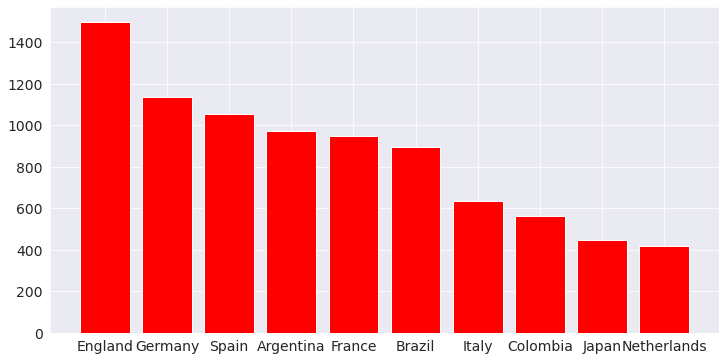

In [11]:
plt.bar(coun.keys(),coun.values,color='red');

In the above figure and data top 10 country player are present in which highest number of players are from England, Germany, Spain and so on as shown in above data and bar diagram.

## Q3. How many total number of goalkeeper are in FIFA21 datasets? Who is the number one goalkeeper from which country and which club? 

In [12]:
gk=football_data.where(football_data['position']=='GK').sort_values('overall',ascending=False)

In [13]:
gk.dropna(axis=0)

,player_id,name,nationality,position,overall,age,hits,potential,team
4,200389.0,Jan Oblak,Slovenia,GK,91.0,27.0,47.0,93.0,Atlético Madrid
11,192448.0,Marc-André ter Stegen,Germany,GK,90.0,28.0,68.0,93.0,FC Barcelona
8,212831.0,Alisson,Brazil,GK,90.0,27.0,53.0,91.0,Liverpool
20,167495.0,Manuel Neuer,Germany,GK,89.0,34.0,42.0,89.0,FC Bayern München
22,210257.0,Ederson,Brazil,GK,88.0,26.0,40.0,91.0,Manchester City
...,...,...,...,...,...,...,...,...,...
17663,251369.0,Ouparine Djoco,France,GK,57.0,22.0,1.0,67.0,Clermont Foot 63
17659,251520.0,Iano? Brînza,Moldova,GK,57.0,21.0,0.0,69.0,Fotbal Club Boto?ani
17654,251837.0,Omar Rodríguez,Colombia,GK,57.0,23.0,0.0,65.0,Independiente Santa Fe
17964,256445.0,Ruvira,Spain,GK,56.0,20.0,0.0,70.0,CF Fuenlabrada


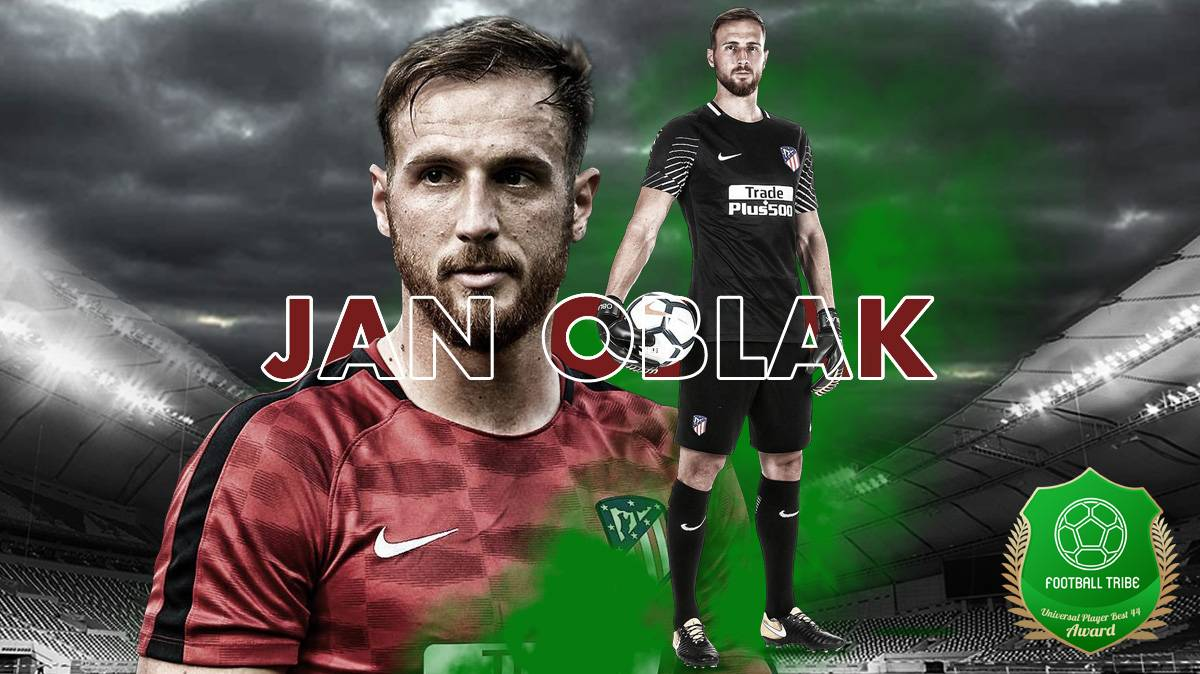

From the above datasets, Since there are 1884 rows so there are 1884 goalkeeper and `Jan Oblak` is the number one goalkeeper of FIFA21. He belongs to Slovenia country and he play with Atletico Madrid club. His overall perfomance is 91 which is the highest in the datasets.

## Q4. Which team is the strongest in this datasets on the basis of overall performance?

In [14]:
teamm=football_data.groupby('team')['overall'].sum().sort_values(ascending=False)
teamm

team
Free Agents          14664
Real Madrid           2627
FC Barcelona          2577
Liverpool             2523
Atlético Madrid       2522
                     ...  
Beijing Renhe FC       558
Cork City              529
Waterford FC           470
Finn Harps             406
UCD AFC                 58
Name: overall, Length: 713, dtype: int64

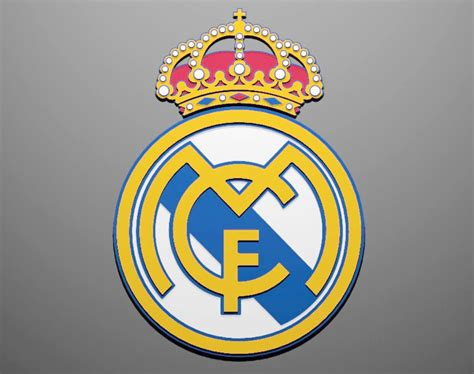

There are 713 rows in the table which means there are `712` teams because `1` extra is free agents which have `14664` players. On the basis of overall perfomance, `Real Madrid` is the strongest team and `FC Barcelona` is behind the Real Madrid.

## Q5. Who is the youngest and oldest player in the FIFA21?

In [15]:
youngest=football_data.sort_values('age',ascending=True)
youngest

,player_id,name,nationality,position,overall,age,hits,potential,team
1637,248243,Eduardo Camavinga,France,CM,75,17,94,86,Stade Rennais FC
15008,253028,Gabriele Plechero,Italy,GK,61,17,1,79,Cittadella
14915,255339,Jayden Nelson,Canada,LM|LW,61,17,2,76,Toronto FC
17075,253971,Tom Dickson-Peters,Scotland,ST,58,17,0,73,Norwich City
17066,254580,Elias Damergy,Tunisia,GK,58,17,0,71,Stade Rennais FC
...,...,...,...,...,...,...,...,...,...
222,1179,Gianluigi Buffon,Italy,GK,83,42,50,83,Juventus
14977,254196,Luis Fernando Fernández,Colombia,GK,61,42,0,61,Sociedad Deportiva Aucas
4150,156483,Cristian Lucchetti,Argentina,GK,72,42,0,72,Atlético Tucumán
13767,208927,Hussain Omar Sulaimani,Saudi Arabia,LB,63,43,1,63,Al Ahli


In [16]:
oldest=football_data.sort_values('age',ascending=False)
oldest

,player_id,name,nationality,position,overall,age,hits,potential,team
13767,208927,Hussain Omar Sulaimani,Saudi Arabia,LB,63,43,1,63,Al Ahli
12887,169108,Leao Butrón,Peru,GK,64,43,0,64,Club Alianza Lima
14977,254196,Luis Fernando Fernández,Colombia,GK,61,42,0,61,Sociedad Deportiva Aucas
222,1179,Gianluigi Buffon,Italy,GK,83,42,50,83,Juventus
726,153260,Hilton,Brazil,CB,79,42,6,79,Montpellier Hérault SC
...,...,...,...,...,...,...,...,...,...
14994,253715,Darío Sarmiento,Argentina,LW,61,17,1,80,Estudiantes de La Plata
14976,254246,Damian Rivera,United States,LW,61,17,4,76,New England Revolution
16985,256307,Luca Oyen,Belgium,ST|CM|CAM,58,17,1,77,KRC Genk
3366,251854,Pedri,Spain,LM|CAM,72,17,54,89,UD Las Palmas


`Eduardo Camavinga` is the youngest player of FIFA21 and many more are there at the age of `17` from France.
`Hussain Omar Sulaimani` and `Leao Butrón` are two oldest player of dataset FIFA21 at the age of `43` from `Saudi Arabia` and `Peru`.

## Q6. Compare the team between Real Madrid and FC Barcelona?


In [17]:
fcbarcelona=football_data.where(football_data['team']=='FC Barcelona ')
fcbarcelona=fcbarcelona.dropna(axis=0)

In [18]:
realmadrid=football_data.where(football_data['team']=='Real Madrid ')
realmadrid=realmadrid.dropna(axis=0)

In [19]:
fcbarcelona.head()

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023.0,Lionel Messi,Argentina,ST|CF|RW,94.0,33.0,299.0,94.0,FC Barcelona
11,192448.0,Marc-André ter Stegen,Germany,GK,90.0,28.0,68.0,93.0,FC Barcelona
16,194765.0,Antoine Griezmann,France,ST|CF|LW,89.0,29.0,66.0,89.0,FC Barcelona
19,176580.0,Luis Suárez,Uruguay,ST,89.0,33.0,54.0,89.0,FC Barcelona
29,189511.0,Sergio Busquets,Spain,CDM,88.0,32.0,34.0,88.0,FC Barcelona


In [20]:
fcbarsa=fcbarcelona[['overall','age','hits','potential']].sum()
fcbarsa

overall      2577.0
age           845.0
hits         1688.0
potential    2781.0
dtype: float64

In [21]:
rm=realmadrid[['overall','age','hits','potential']].sum()
rm

overall      2627.0
age           845.0
hits         1195.0
potential    2815.0
dtype: float64

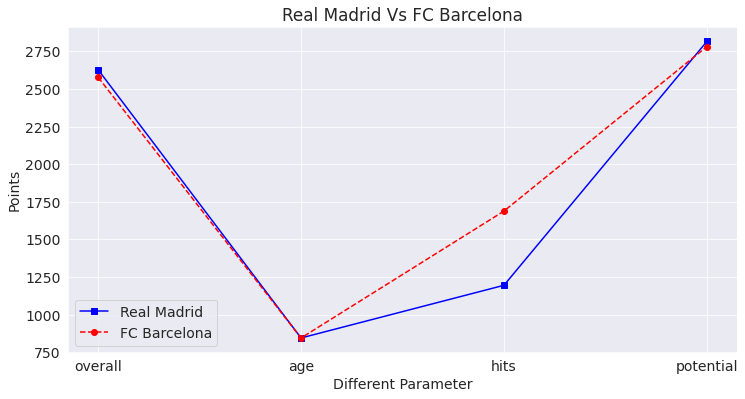

In [22]:
plt.plot(rm.keys(),rm,'s-b')
plt.plot(rm.keys(),fcbarsa, 'o--r')
plt.title('Real Madrid Vs FC Barcelona')
plt.xlabel('Different Parameter')
plt.ylabel('Points')
plt.legend(['Real Madrid','FC Barcelona']);

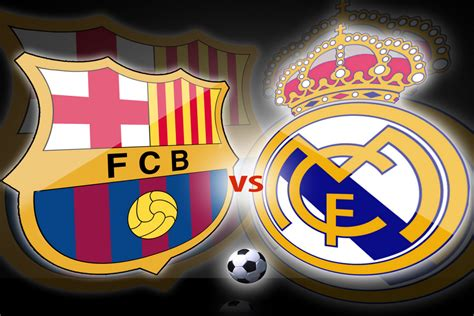

From the above graphs and data we are comparing the `Real Madrid` and `FC Barcelona` team. In `overall` perfomance it's clear that `Real Madrid` is better than `FC Barcelona` but when it's come to comparing the `hits` the players have kick. `FC Barcelona` is leading ahead than `Real Madrid`. 

## Who is the best player of FIFA21?

In [23]:
best_player=football_data.sort_values('overall',ascending=False)
best_player

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid
...,...,...,...,...,...,...,...,...,...
17967,256329,Hassan Al Shamrani,Saudi Arabia,CB|CDM,56,29,0,57,Damac FC
17965,256436,Erland Tangvik,Norway,GK,56,23,0,63,Djurgårdens IF
17964,256445,Ruvira,Spain,GK,56,20,0,70,CF Fuenlabrada
17963,256469,Juan Camilo Suárez,Colombia,CB,56,21,0,63,Envigado FC


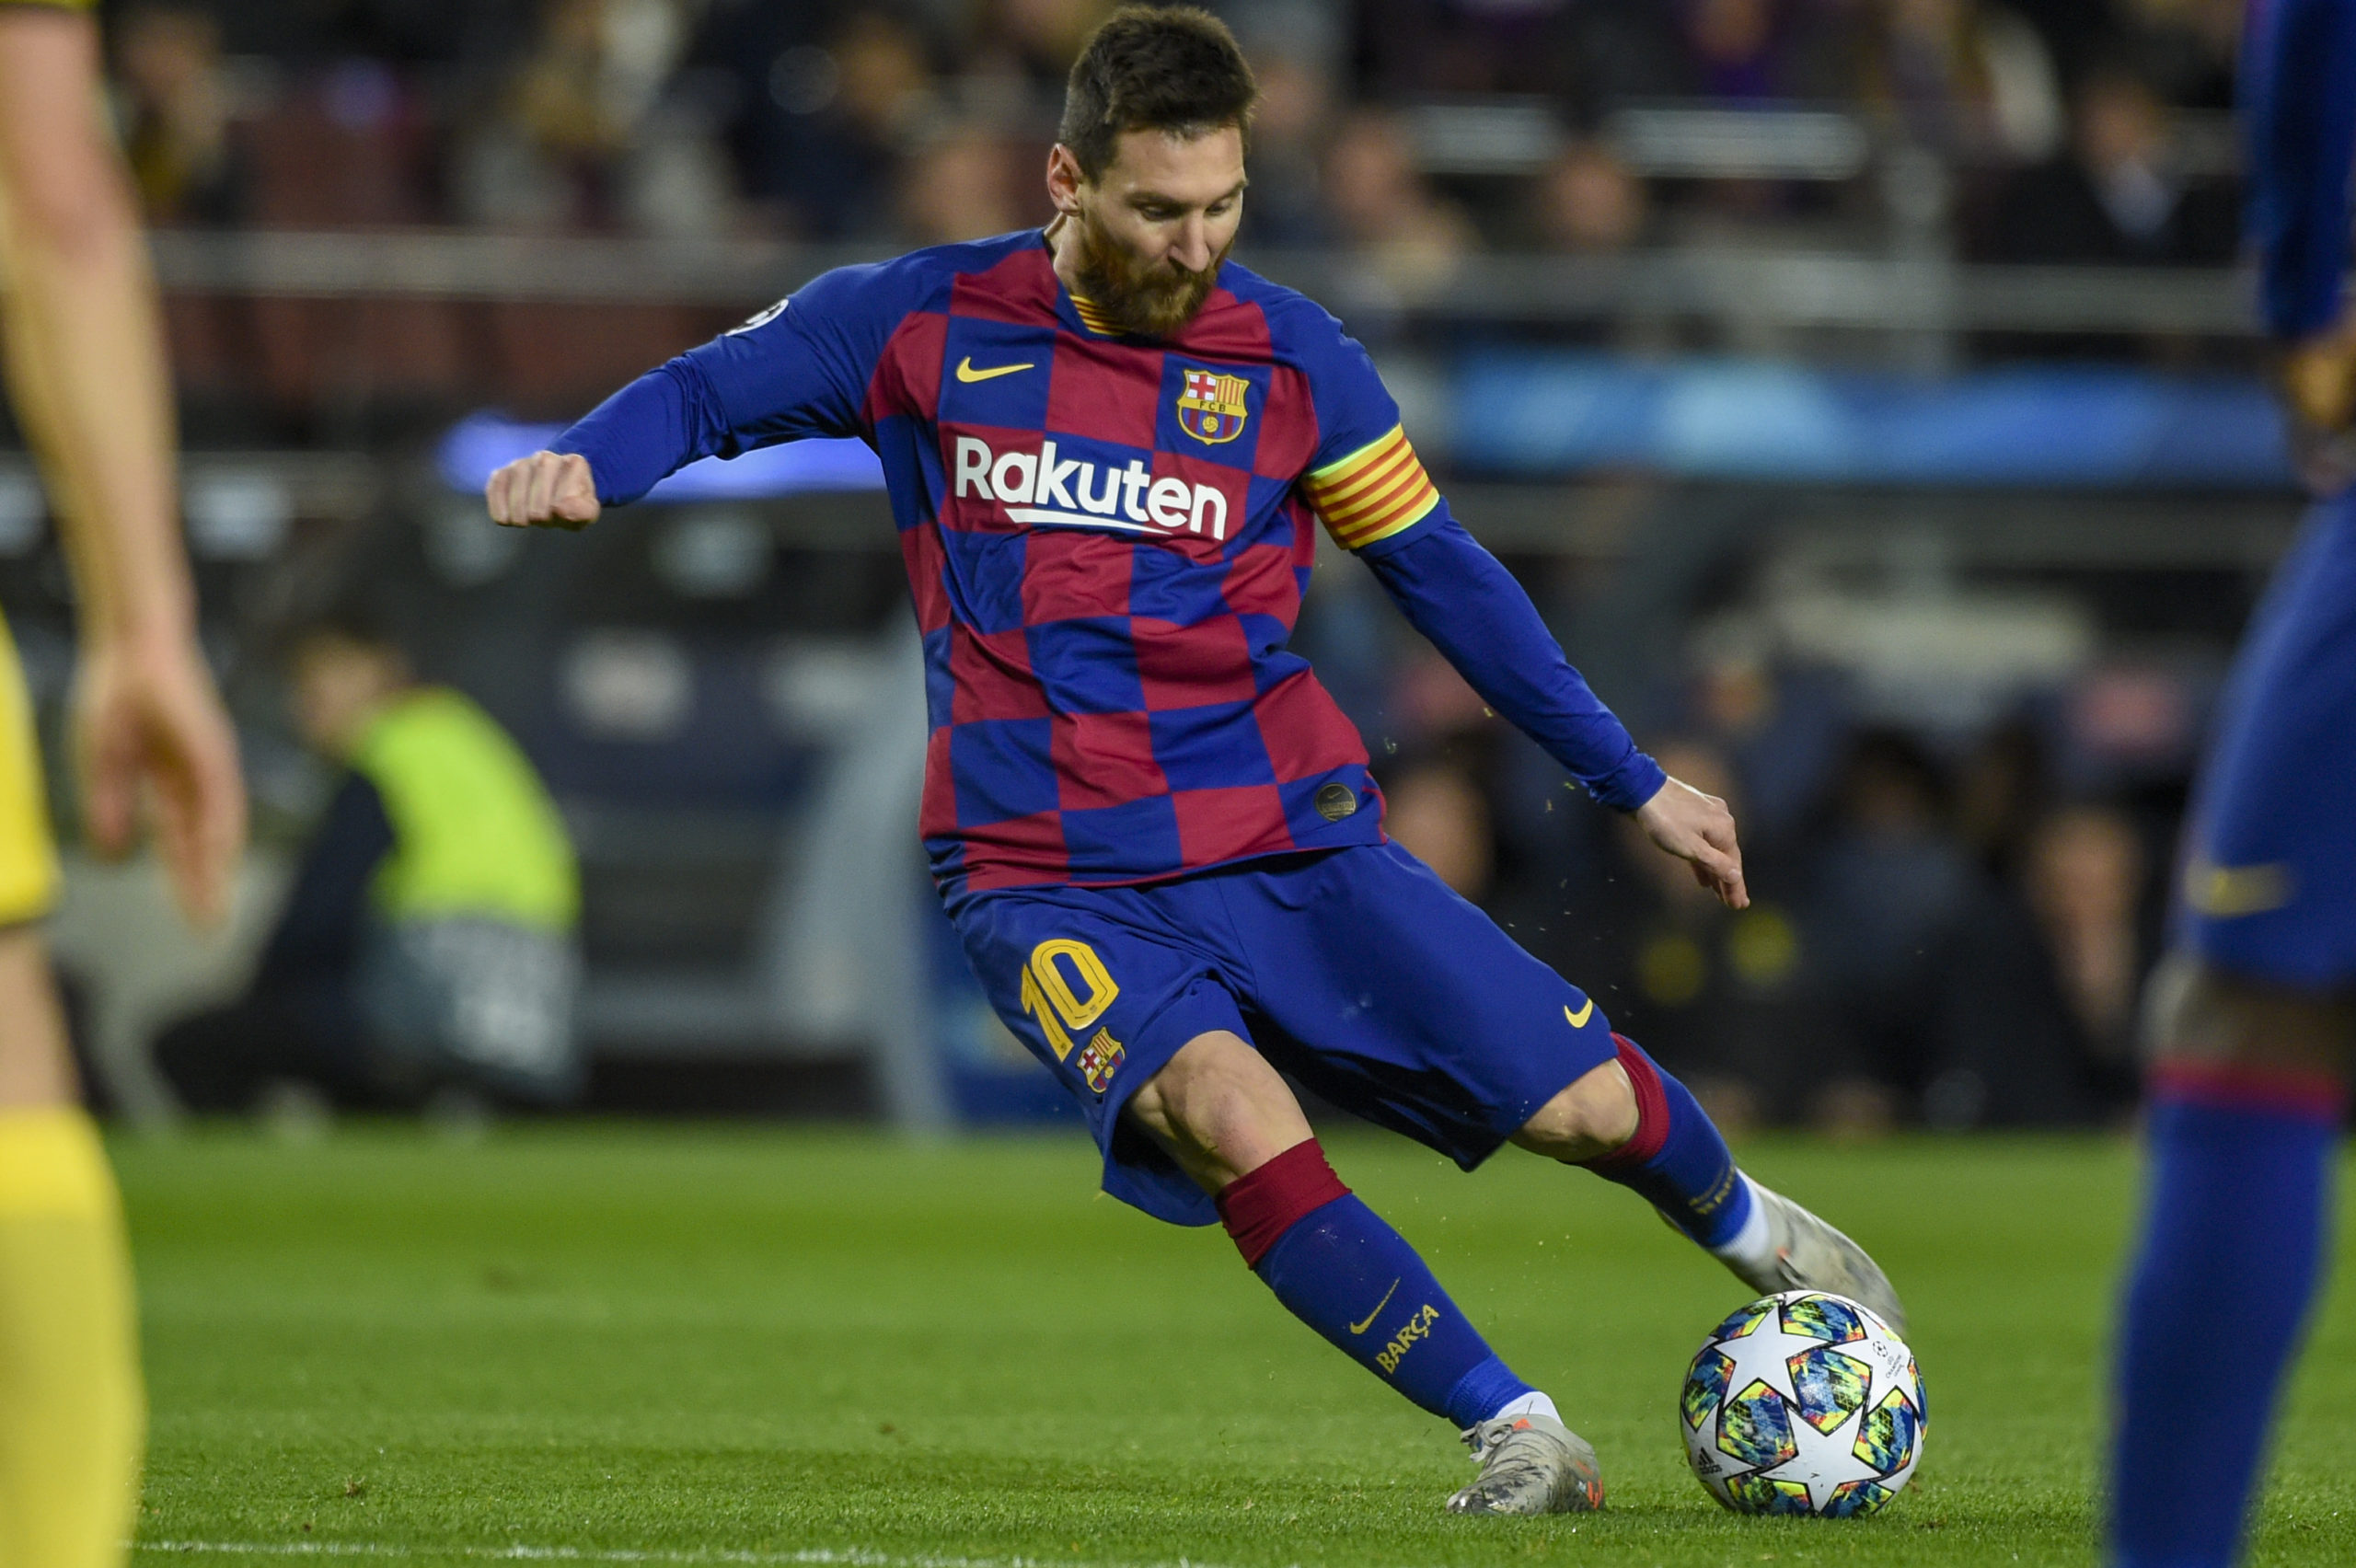

Since, `Lionel Messi` from Argentina have higest overall perfomance and hits. So, He is the best player of `FIFA21`.

## Hence, As per above data Real Madrid is best team.

In [24]:
jovian.commit(project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aaarif796/football-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/aaarif796/football-analysis


'https://jovian.ai/aaarif796/football-analysis'

In [25]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aaarif796/football-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/aaarif796/football-analysis


'https://jovian.ai/aaarif796/football-analysis'

In [26]:
jovian.submit(assignment="zero-to-pandas-project")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aaarif796/football-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/aaarif796/football-analysis
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
